<a href="https://colab.research.google.com/github/Julianajjss/case_iFood/blob/main/Data_Reporting_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória - Case iFood**


##### importando as bibliotecas necessarias

In [ ]:
import pandas as pd
import json
import pytz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 20.6 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
my_timezone = pytz.timezone('Brazil/East')

## **API YouTube**

##### API do Youtube para por as categorias

In [ ]:
from googleapiclient.discovery import build

In [ ]:
df.titleUrl.fillna(value='', inplace=True)
df = df[df.titleUrl != '']

NameError: ignored

In [ ]:
categories = pd.read_csv('https://gist.githubusercontent.com/Vithork/7e9d0fe79796e4cfd27411d5e92df601/raw/c943eafd695f123bc0e5fc5167846e2fa4265fbc/csv')
categories = categories.set_index('name').number.to_dict()
categories = dict((str(y),x) for x,y in categories.items())

In [ ]:
def main(api_key, df):
  def puxa_categoria():
    lista = puxa_json()
    lista_categorias = []
    for i in range(len(lista)):
      try:
        lista_categorias.append(lista[i]['items'][0]['snippet']['categoryId'])
      except:
        lista_categorias.append('00')
    return [categories.get(n, n) for n in lista_categorias]
  
  def puxa_json():
    youtube = build('youtube', 'v3', developerKey=api_key)
    part_string = 'snippet'
    lista = []
    video_ids = 0 
    for index, row in df.iterrows():
      video_ids = (row['titleUrl'][-11:])
      requests = youtube.videos().list(
        	part=part_string,
        	id=video_ids
        ).execute()
      lista.append(requests)
    return lista
  return puxa_categoria()

In [ ]:
#categoria_valores = main('API',df)

In [ ]:
#df['categories'] = categoria_valores

## **Dados YouTube - Limpeza + Análise**

##### Fazendo a leitura do csv com as categorias

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/youtube_cate.csv',encoding='utf-8')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#with open('/content/drive/MyDrive/Colab Notebooks/historico_vizualizacao.json','r', encoding='utf-8') as f:  
    #data = json.loads(f.read())

In [ ]:
#no_ads_data = [row for row in data if 'subtitles' in row.keys()]

In [ ]:
#df = pd.json_normalize(no_ads_data, 
                       #record_path=['subtitles'], 
                       #meta=['header', 'title', 'titleUrl', 'time', 'products', 'details'],
                       #errors='ignore',
                       #record_prefix='subtitles.'
                     #)

In [ ]:
#df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528 entries, 0 to 7527
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7528 non-null   int64  
 1   subtitles.name  7528 non-null   object 
 2   subtitles.url   7528 non-null   object 
 3   header          7528 non-null   object 
 4   title           7528 non-null   object 
 5   titleUrl        7528 non-null   object 
 6   time            7528 non-null   object 
 7   products        7528 non-null   object 
 8   details         0 non-null      float64
 9   categories      7528 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 588.2+ KB


##### **Renomeando Colunas**

In [ ]:
df.rename(columns={'subtitles.name': 'chanel', 'subtitles.url': 'chanelUrl'}, inplace=True)

##### Respondendo as perguntas com os dados

#### **Quais canais Juliana mais assistiu vídeo?**


In [ ]:
df.chanel.value_counts().head(10)

AM3NlC                 738
Canal dos Caçadores    574
MasterChef Brasil      413
Rio4fun                230
MK MUSIC               223
Prefiro Viajar         159
Canal GNT              125
EduKof                 125
NatirutsVEVO            83
Pesadelo na Cozinha     75
Name: chanel, dtype: int64

In [ ]:
df.to_csv('canais.csv')

#### **Quais categorias Juliana mais assiste?**

In [ ]:
df.categories.value_counts().head(4)

Music              2366
Entertainment      2026
People & Blogs     1493
Travel & Events     681
Name: categories, dtype: int64

#### **WordCloud**

In [ ]:
df['title'].to_csv('hist_youtube_views.txt', sep=' ', index=False)

In [ ]:
!pip install wordcloud

(-0.5, 1599.5, 899.5, -0.5)

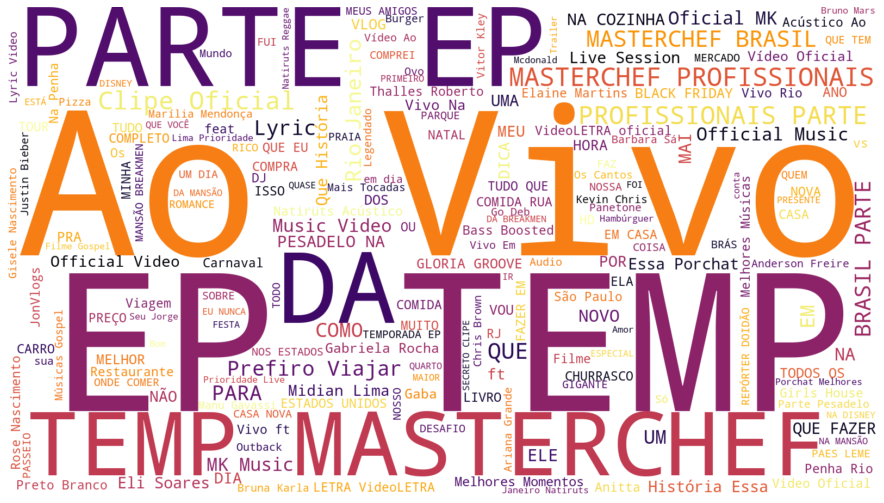

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# Reading the script
script = open("hist_youtube_views.txt", encoding='utf-8').read()
# Set of Stop words
stopwords = set(STOPWORDS)
stopwords.add('Nova Guia')
stopwords.add('Nova guia')
stopwords.add('De')
stopwords.add('Watched')
stopwords.add('A')
stopwords.add("EduKof")
# Create WordCloud Object
wc = WordCloud(background_color="white", stopwords=stopwords, 
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(script)
# Show the WordCloud
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.time.dt.year.unique()


#### **Quantos vídeos Juliana viu por categoria?**

In [ ]:
grp_cat =df.groupby(['chanel','categories'], as_index=False).size()
grp_cat.head(10)

,chanel,categories,size
0,- RMG -,People & Blogs,1
1,1 por Todos,Entertainment,1
2,101K,Music,1
3,157nene59,Music,1
4,1FOX,Music,1
5,1MILLION Dance Studio,Entertainment,2
6,2M TALIBÃ ϟ,Music,1
7,30PRAUM,Music,15
8,360go,Travel & Events,1
9,3DURLZ,Music,1


In [ ]:
grp_cat.plot(
kind='barh', 
    x='size', 
    y= 'categories',  
    barmode='group',
    title='Número dos vídeos assistidos por categoria')

## **Dados Facebook - Limpeza + Análise**

### **Em qual grupo do Facebook Juliana interaje mais?** 


##### Conectando o arquivo e criando um dataframe

In [ ]:
inter =pd.read_json('/content/drive/MyDrive/Colab Notebooks/group_interactions.json',encoding='utf-8')


In [ ]:
inter.head()

,group_interactions_v2
0,"{'name': '', 'description': '', 'entries': [{'..."


In [ ]:
entries=pd.json_normalize(inter['group_interactions_v2'])['entries']

In [ ]:
type(entries)

pandas.core.series.Series

In [ ]:
entries.keys()

RangeIndex(start=0, stop=1, step=1)

In [ ]:
name= pd.json_normalize(entries[0])
name.head()

,data.name,data.value,data.uri
0,Au Pair GrupÃ£o Brasil,1.271 vezes,https://www.facebook.com/groups/Aupairgrupaobr...
1,Liga dos Vestibulandos,1.059 vezes,https://www.facebook.com/groups/descomplicatur...
2,CACHEADAS EM TRANSIÃÃO,907 vezes,https://www.facebook.com/groups/883472135004229/
3,Meu cabelo tipo 4 Natural,690 vezes,https://www.facebook.com/groups/meucabelotipo4/
4,Cacheadas em TransiÃ§Ã£o(OFICIAL 2012),344 vezes,https://www.facebook.com/groups/487145284650001/


### **Quais reações Juliana mais usa no Facebook?**


##### Conectando com o arquivo no google drive e criando um dataframe

In [ ]:
reactions = pd.read_json('/content/drive/MyDrive/Colab Notebooks/posts_and_comments.json',encoding='utf-8')

In [ ]:
reactions.head()

,reactions_v2
0,"{'timestamp': 1533354683, 'data': [{'reaction'..."
1,"{'timestamp': 1533381209, 'data': [{'reaction'..."
2,"{'timestamp': 1533381177, 'data': [{'reaction'..."
3,"{'timestamp': 1533354683, 'data': [{'reaction'..."
4,"{'timestamp': 1533550557, 'data': [{'reaction'..."


In [ ]:
reactions2=pd.json_normalize(reactions['reactions_v2'], max_level=2)

In [ ]:
reactions2.explode('data')

,timestamp,data,title,attachments
0,1533354683,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu a foto de Deysiane Mene...,NaN
1,1533381209,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu o comentÃ¡rio de Elber ...,NaN
2,1533381177,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu a foto de Quebrando o T...,NaN
3,1533354683,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu a foto de Deysiane Mene...,NaN
4,1533550557,"{'reaction': {'reaction': 'SORRY', 'actor': 'J...",Juliana Santana reagiu a uma publicaÃ§Ã£o.,NaN
...,...,...,...,...
26221,1627950790,"{'reaction': {'reaction': 'LOVE', 'actor': 'Ju...",Juliana Santana reagiu a uma publicaÃ§Ã£o.,NaN
26222,1627944100,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu o comentÃ¡rio de Bruno ...,NaN
26223,1627933141,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu o comentÃ¡rio de Samuel...,NaN
26224,1627932869,"{'reaction': {'reaction': 'LIKE', 'actor': 'Ju...",Juliana Santana curtiu a foto de A Luta.,NaN


In [ ]:
reacoes_lista=[]
for i in reactions2['data']:
  reacoes_lista.append(i[0]['reaction']['reaction'])

In [ ]:
lista = pd.Series(reacoes_lista)

In [ ]:
reactions2['reacoes']=lista

In [ ]:
reactions2.head()

,timestamp,data,title,attachments,reacoes
0,1533354683,"[{'reaction': {'reaction': 'LIKE', 'actor': 'J...",Juliana Santana curtiu a foto de Deysiane Mene...,NaN,LIKE
1,1533381209,"[{'reaction': {'reaction': 'LIKE', 'actor': 'J...",Juliana Santana curtiu o comentÃ¡rio de Elber ...,NaN,LIKE
2,1533381177,"[{'reaction': {'reaction': 'LIKE', 'actor': 'J...",Juliana Santana curtiu a foto de Quebrando o T...,NaN,LIKE
3,1533354683,"[{'reaction': {'reaction': 'LIKE', 'actor': 'J...",Juliana Santana curtiu a foto de Deysiane Mene...,NaN,LIKE
4,1533550557,"[{'reaction': {'reaction': 'SORRY', 'actor': '...",Juliana Santana reagiu a uma publicaÃ§Ã£o.,NaN,SORRY


In [ ]:
reactions2['reacoes'].value_counts()

LIKE     16193
HAHA      4979
LOVE      3715
ANGER      657
SORRY      613
WOW         69
Name: reacoes, dtype: int64

In [ ]:
reactions2['reacoes'].value_counts().plot(kind='barh')

##### Transformando o dataframe em csv

In [ ]:
reactions2.to_csv('reacoes.csv')

### **Quais perfis no Facebook Juliana mais deu like?**


In [ ]:
 visitas = pd.read_json('/content/drive/MyDrive/Colab Notebooks/visitas_perfis_page_noface.json',encoding='utf-8')

In [ ]:
visitas.head()

,visited_things_v2
0,"{'name': 'Visitas ao perfil', 'description': '..."
1,"{'name': 'Visitas Ã PÃ¡gina', 'description': ..."
2,"{'name': 'Eventos visitados', 'description': '..."
3,"{'name': 'Grupos visitados', 'description': 'G..."
4,"{'name': 'Visitas ao Marketplace', 'descriptio..."


In [ ]:
description=pd.json_normalize(visitas['visited_things_v2'])


In [ ]:
type(name)

pandas.core.frame.DataFrame

In [ ]:
name=name.to_dict()

In [ ]:
name.keys()

dict_keys(['data.name', 'data.value', 'data.uri'])

## **Dados Instagram - Limpeza + Análise**

##### Conectando com o arquivo no google drive e criando um dataframe

In [ ]:
likes = pd.read_json('/content/drive/MyDrive/Colab Notebooks/curtidas.json',
                     encoding='UTF-8')
likes.head()

,likes_media_likes
0,"{'title': 'c.syresmith', 'media_list_data': []..."
1,"{'title': 'toupassada', 'media_list_data': [],..."
2,"{'title': 'sarcasmofeminino', 'media_list_data..."
3,"{'title': 'sarcasmofeminino', 'media_list_data..."
4,"{'title': 'sarcasmofeminino', 'media_list_data..."


In [ ]:
timestamp = pd.json_normalize(likes["likes_media_likes"],
                              "string_list_data")['timestamp']
timestamp

0        1423748154
1        1423656851
2        1423654789
3        1423604908
4        1423604872
            ...    
28315    1614204806
28316    1614204800
28317    1614204783
28318    1614204781
28319    1614204779
Name: timestamp, Length: 28320, dtype: int64

In [ ]:
title = pd.json_normalize(likes["likes_media_likes"])["title"]
title

0             c.syresmith
1              toupassada
2        sarcasmofeminino
3        sarcasmofeminino
4        sarcasmofeminino
               ...       
28315      burgerdaybrasa
28316        julyvenancio
28317            juliette
28318              anitta
28319     taosonhadolar37
Name: title, Length: 28320, dtype: object

In [ ]:
data = {
    'title': title,
    'timestamp': timestamp 
}

likes = pd.concat(data, axis = 1)

likes.head()

,title,timestamp
0,c.syresmith,1423748154
1,toupassada,1423656851
2,sarcasmofeminino,1423654789
3,sarcasmofeminino,1423604908
4,sarcasmofeminino,1423604872


In [ ]:
likes.shape

(28320, 2)

In [ ]:
likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28320 entries, 0 to 28319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      28320 non-null  object
 1   timestamp  28320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 442.6+ KB


In [ ]:
likes.describe()

,timestamp
count,2.832000e+04
mean,1.528106e+09
std,6.122442e+07
min,1.368035e+09
25%,1.478789e+09
50%,1.523656e+09
75%,1.590717e+09
max,1.626556e+09


###### convertendo timestamp para datetime


In [ ]:
likes['timestamp'] = pd.to_datetime(likes['timestamp'], unit='s')

In [ ]:
likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28320 entries, 0 to 28319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      28320 non-null  object        
 1   timestamp  28320 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 442.6+ KB



##### arrumando as colunas de ano,mês,dia e dias da semana pelo timestamp


In [ ]:
likes['year'] = pd.DatetimeIndex(likes['timestamp']).year
likes['month'] = pd.DatetimeIndex(likes['timestamp']).month
likes['day'] = pd.DatetimeIndex(likes['timestamp']).day
likes['day_name'] = likes['timestamp'].dt.day_name()
likes.head()

,title,timestamp,year,month,day,day_name
0,c.syresmith,2015-02-12 13:35:54,2015,2,12,Thursday
1,toupassada,2015-02-11 12:14:11,2015,2,11,Wednesday
2,sarcasmofeminino,2015-02-11 11:39:49,2015,2,11,Wednesday
3,sarcasmofeminino,2015-02-10 21:48:28,2015,2,10,Tuesday
4,sarcasmofeminino,2015-02-10 21:47:52,2015,2,10,Tuesday


In [ ]:
likes['timestamp'].dt.hour

0        13
1        12
2        11
3        21
4        21
         ..
28315    22
28316    22
28317    22
28318    22
28319    22
Name: timestamp, Length: 28320, dtype: int64

In [ ]:
likes.shape

(28320, 6)

##### função para criar colunas com os horários e parte do dia

In [ ]:
def get_part_of_day(x):
    if (x > 7) and (x <= 11):
        return 'Manhã'
    elif (x > 11) and (x <= 17 ):
        return 'Tarde'
    elif (x > 17) and (x <= 23):
        return 'Noite'
    elif (x >= 0) and (x <= 6) :
        return 'Madrugada'
likes['part_of_day'] = likes['timestamp'].dt.hour.apply(get_part_of_day)

##### adicionando os títulos dos meses

In [ ]:
month = {	
    1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'		
}

likes['month'].replace(month, inplace=True)
likes.head()

,title,timestamp,year,month,day,day_name,part_of_day
0,c.syresmith,2015-02-12 13:35:54,2015,February,12,Thursday,Tarde
1,toupassada,2015-02-11 12:14:11,2015,February,11,Wednesday,Tarde
2,sarcasmofeminino,2015-02-11 11:39:49,2015,February,11,Wednesday,Manhã
3,sarcasmofeminino,2015-02-10 21:48:28,2015,February,10,Tuesday,Noite
4,sarcasmofeminino,2015-02-10 21:47:52,2015,February,10,Tuesday,Noite


##### criando o arquivo csv

In [ ]:
likes.to_csv('curtidas.csv')


##### respondendo as perguntas

#### **Quais as contas no Instagram Juliana mais deu like?**


In [ ]:
likes = pd.read_csv('curtidas.csv', index_col=[0])
likes['timestamp'] = pd.to_datetime(likes['timestamp'])
likes.head()

,title,timestamp,year,month,day,day_name,part_of_day
0,c.syresmith,2015-02-12 13:35:54,2015,February,12,Thursday,Tarde
1,toupassada,2015-02-11 12:14:11,2015,February,11,Wednesday,Tarde
2,sarcasmofeminino,2015-02-11 11:39:49,2015,February,11,Wednesday,Manhã
3,sarcasmofeminino,2015-02-10 21:48:28,2015,February,10,Tuesday,Noite
4,sarcasmofeminino,2015-02-10 21:47:52,2015,February,10,Tuesday,Noite


In [ ]:
likes.title.value_counts()

instasurreal              2201
anitta                    1035
canaldoscacadores          689
chloeclem                  672
toupassada                 639
                          ... 
geerocha                     1
thebryanabasolo              1
universalorlandohotels       1
marcelofreixo                1
marinabagarolli              1
Name: title, Length: 1754, dtype: int64

#### **Quantos likes Juliana já distribuiu no Instagram?**

In [ ]:
likes.shape

(28320, 7)

#### **Quais as contas que Juliana mais deu like ao longo dos anos?**

In [ ]:
likes.groupby(['year','title'],as_index= False).size().sort_values(['year','size'],ascending = False).groupby('year').head(3)

,year,title,size
2315,2021,isaias,254
2338,2021,juliette,171
2109,2021,canaldoscacadores,109
1568,2020,canaldoscacadores,197
1890,2020,projetomilhao,194
1801,2020,manugavassi,146
1260,2019,anitta,215
1273,2019,canaldoscacadores,191
1428,2019,promilitares,149
817,2018,anitta,241


#### **Quantos likes Juliana distribuiu por ano?**



In [ ]:
likes_anos = likes['year'].value_counts()
likes_anos


2016    5553
2020    5212
2017    4829
2018    3986
2021    3245
2019    2632
2015    2321
2014     530
2013      12
Name: year, dtype: int64

#### **E por mês?**

In [ ]:
likes_mes = likes['month'].value_counts()
likes_mes

December     2843
March        2679
November     2651
June         2411
January      2399
May          2335
July         2325
April        2301
October      2228
September    2141
February     2126
August       1881
Name: month, dtype: int64

In [ ]:
likes.to_csv('likes_insta.csv')